In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Reading the dataset by useing read_csv function also I used the sep paramete because my dataset seperated by a semicolon 

In [8]:
df=pd.read_csv("../DataSet/cardiovascular_diseases.csv",sep = ';'  )


show the shape of my dataset by useing shape

In [9]:
df.shape

(70000, 13)

as see in results of df.shape : the number of the columns is 13 and the number of the rows 70000

In [351]:
#it will show the name of the columns and if there are having messing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
df.head(5) #showing random data from the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#the names of the columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

*Cleaning the dataset:


In [353]:
#drop in useful column that contains data it will not be used in data analysis 
df=df.drop('id', axis=1)

In [354]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


*some calculation:


In [355]:
#calculate the age by yera
df['age']=round(df['age']/365.25)

In [356]:
df.head(5) 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [357]:
#use the height and weight to calculate bmi(Body Mass Index)
df['bmi']=round((df['weight']/(df['height']/100)**2), 1)

In [358]:
df.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.9
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.1
69999,56.0,1,170,72.0,120,80,2,1,0,0,1,0,24.9


In [363]:
#this will help me when do data analysis
def gender(gender):
    if gender==1:
        return 'Female'
    else:
        return 'Male'
    

In [364]:
df['gender']=df.gender.apply(gender)

In [366]:
df.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,53.0,Male,168,76.0,120,80,1,1,1,0,1,0,26.9
69996,62.0,Female,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,52.0,Male,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,61.0,Female,163,72.0,135,80,1,2,0,0,0,1,27.1
69999,56.0,Female,170,72.0,120,80,2,1,0,0,1,0,24.9


In [359]:
df[["age","smoke","active","bmi"]].describe()

,age,smoke,active,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,0.088129,0.803729,27.555311
std,6.760171,0.283484,0.397179,6.092596
min,30.000000,0.000000,0.000000,3.500000
25%,48.000000,0.000000,1.000000,23.900000
50%,54.000000,0.000000,1.000000,26.400000
75%,58.000000,0.000000,1.000000,30.200000
max,65.000000,1.000000,1.000000,298.700000


The mean age is 53.
The percentage of smokers is 8.
The percentage of do sports is 80.


*Data Analysis:

In [367]:
#average cardiovascular disease rate by gender
df[["gender","cardio"]].groupby(["gender"], as_index = False).mean().sort_values(by="cardio",ascending = False)

,gender,cardio
1,Male,0.505231
0,Female,0.496727


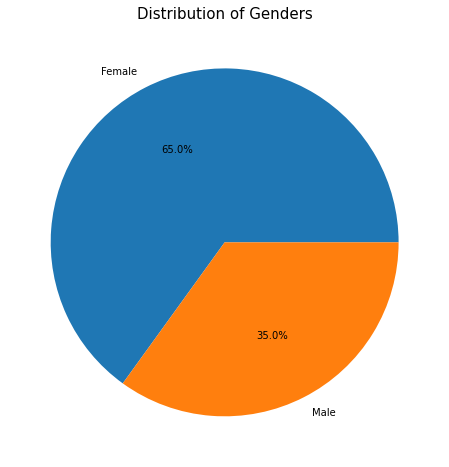

In [368]:
labels = df['gender'].value_counts().index
sizes = df['gender'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Genders",color = 'black',fontsize = 15);

The percentage of males with cardiovascular diseases is 35.0%.
The percentage of females with cardiovascular diseases is 65%.

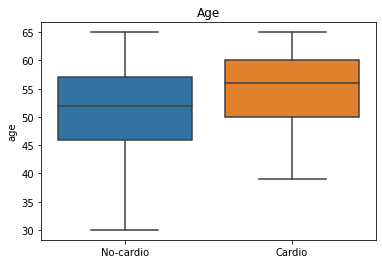

In [376]:
ax = sns.boxplot(x="cardio", y="age", data=df)
ax.title.set_text('Age')
ax.set_xticklabels(['No-cardio','Cardio']);

The elderly people are most likely to have the cardiovascular diseases.

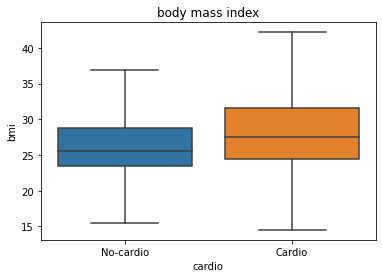

In [377]:
ax = sns.boxplot(x="cardio", y="bmi",showfliers=False, data=df)
ax.title.set_text('body mass index')
ax.set_xticklabels(['No-cardio','Cardio']);

The people with higher body mass index are most likely to have cardiovascular diseases.